In [1]:
# Advanced Data Preprocessing for Machine Learning

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

# Loading the dataset
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
# Displaying a sample of the training data
data_train.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S


# Exploratory Data Analysis (EDA)

Visualizations are vital in understanding data distributions and relationships between variables. Below, we examine the dataset for initial insights:

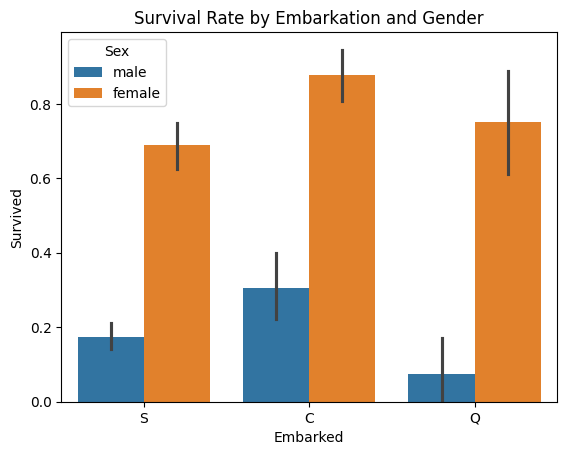

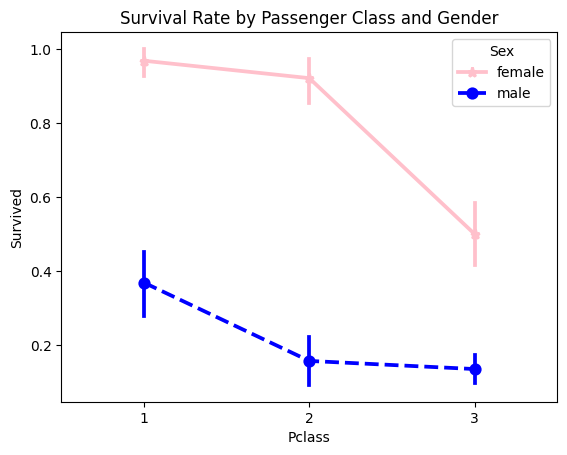

In [2]:
# Visualizing survival rates by Embarkation and Sex
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)
plt.title('Survival Rate by Embarkation and Gender')
plt.show()

# Survival rates by Passenger Class and Gender
sns.pointplot(
    x="Pclass", y="Survived", hue="Sex", data=data_train,
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"], linestyles=["-", "--"]
)
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()


# Feature Engineering

Feature engineering improves model performance by transforming raw data into meaningful features.
1. Handling Missing Values

Instead of arbitrary imputation, let's use a more advanced method:

In [3]:
# Impute missing Age with median
imputer = SimpleImputer(strategy="median")
data_train["Age"] = imputer.fit_transform(data_train[["Age"]])
data_test["Age"] = imputer.transform(data_test[["Age"]])

# Fill missing Embarked values with the most frequent category
data_train["Embarked"].fillna(data_train["Embarked"].mode()[0], inplace=True)
data_test["Embarked"].fillna(data_train["Embarked"].mode()[0], inplace=True)

# Fill missing Fare with median
data_test["Fare"].fillna(data_train["Fare"].median(), inplace=True)
data_train.sample(5)


/tmp/ipykernel_21458/1731423721.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train["Embarked"].fillna(data_train["Embarked"].mode()[0], inplace=True)
/tmp/ipykernel_21458/1731423721.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


Simplifying Continuous Features

For non-linear models, binning continuous features like Age and Fare can be helpful:

In [4]:
def simplify_ages(df):
    bins = [0, 12, 18, 25, 35, 70]
    labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
    return df

def simplify_fares(df):
    bins = [-1, 7.91, 14.454, 31, 1000]
    labels = ['Low', 'Medium', 'High', 'Very High']
    df['FareBand'] = pd.cut(df['Fare'], bins=bins, labels=labels)
    return df

data_train = simplify_ages(data_train)
data_test = simplify_ages(data_test)

data_train = simplify_fares(data_train)
data_test = simplify_fares(data_test)
data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareBand
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S,Adult,Medium
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,Teenager,Medium
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S,Senior,Medium
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,28.0,1,0,PC 17604,82.1708,NaN,C,Adult,Very High
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,Senior,Very High


# Extracting Information from Text

In [5]:
# Extracting title from Name
def extract_title(df):
    df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
    return df

data_train = extract_title(data_train)
data_test = extract_title(data_test)
data_train.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareBand,Title
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,Young Adult,Very High,Mrs
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Young Adult,Very High,Miss
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,Senior,Very High,Mrs
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S,Adult,Medium,Mr
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,Adult,High,Mr


# Dropping Redundant Features

In [6]:
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Cabin'], axis=1)

data_train = drop_features(data_train)
data_test = drop_features(data_test)
data_train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareBand,Title
78,79,1,2,male,0.83,0,2,29.0000,S,Child,High,Master
179,180,0,3,male,36.00,0,0,0.0000,S,Senior,Low,Mr
734,735,0,2,male,23.00,0,0,13.0000,S,Young Adult,Medium,Mr
122,123,0,2,male,32.50,1,0,30.0708,C,Adult,High,Mr
469,470,1,3,female,0.75,2,1,19.2583,C,Child,High,Miss


# Encoding Categorical Features
Ona mportant part of the preprocessing phase is to normalize labels. The LabelEncoder in Scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms.

The result is a table of numbers that looks scary to humans, but beautiful to machines.


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical features
categorical_features = ['Sex', 'Embarked', 'AgeGroup', 'FareBand', 'Title']

# Configure OneHotEncoder to ignore unknown categories
one_hot = OneHotEncoder(handle_unknown='ignore')

# Apply OneHotEncoder using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features)
    ],
    remainder='passthrough'  # Leave numerical features untouched
)

# Drop the 'Survived' column from training data during transformation
data_train_transformed = preprocessor.fit_transform(data_train.drop(columns=['Survived']))
data_test_transformed = preprocessor.transform(data_test)

# Check the transformed data
# print(data_train_transformed)
# print(data_test_transformed)

# Scaling Features

In [8]:
# Scaling numerical features after transformation
scaler = StandardScaler(with_mean=False)  # Ensure compatibility with sparse matrices
data_train_scaled = scaler.fit_transform(data_train_transformed)
data_test_scaled = scaler.transform(data_test_transformed)
# print(data_train_scaled)
# print(data_test_scaled)

# Pipeline for Automated Preprocessing

In [9]:
# Creating a full pipeline
def preprocess_pipeline():
    numeric_features = ['Age', 'Fare']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    return preprocessor

preprocessor = preprocess_pipeline()
